# Methodology
## Data Sources
<details>
<summary>The analysis utilizes two primary datasets:</summary>
  <ul>
    <li>`IRENA_OFGStats_mw.cleaned.xlsx` : Contains data on off-grid solar PV capacity
 in Megawatts (MW), including various solar PV technologies.</li>
    <li>`IRENA_OFGStats_thousands.cleaned.xlsx` : Contains data on the number of
 people connected to off-grid solar PV systems in thousands, covering different</li>
  </ul>
 </details>
<p><strong>social impact technologies</strong></p>
 Both datasets include a 'Conflict Status' column, which categorizes regions/countries
 as either 'Conflict' or 'No Conflict' for each given year. The data spans from 
 2000 to 2025

## Analytical approach
<details>
<summary>The analysis was conducted using Python with the pandas, matplotlib, and seaborn
 libraries. The approach involved:</summary>
<ul>
    <li>Data Exploration: Initial examination of both datasets to understand their
 structure, unique values, and overall distributions. This confirmed the presence
 of 'Conflict Status' and 'Technology' columns crucial for the analysis.</li>
    <li>Environmental Impact Analysis: Focused on the
 IRENA_OFGStats_mw.cleaned.xlsx dataset. Solar PV capacity trends were
 analyzed over time, comparing 'Conflict' and 'No Conflict' regions. Average
 capacities per country and regional deployment patterns were also examined.</li>
    <li>Social Impact Analysis: Focused on the
 IRENA_OFGStats_thousands.cleaned.xlsx dataset. Trends in the number of
 people connected to solar PV systems were analyzed, comparing 'Conflict' and
 'No Conflict' regions. Average connections per country and regional social impact
 were also assessed.</li>
    <li>Comparative Analysis and Visualization: Generated line plots to visualize
 trends over time and bar charts. These visualizations
 highlight the differential impacts of conflict on solar PV deployment and
 consumption.</li>
 <ul>
</details>

# Environmental Impact Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mw = pd.read_excel(
    "../../1_datasets/cleaned_data/IRENA_OFGStats_mw.cleaned.xlsx",
    sheet_name="Cleaned_data",
)
thousands = pd.read_excel(
    "../../1_datasets/cleaned_data/IRENA_OFGStats_thousands.cleaned.xlsx",
    sheet_name="Cleaned_data",
)

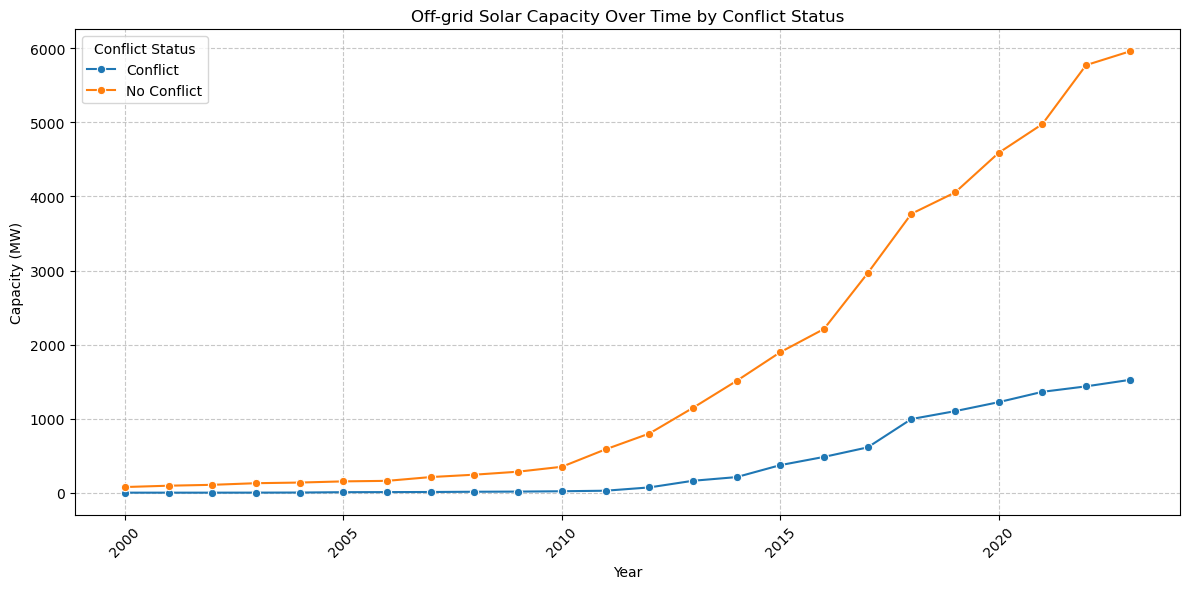

In [3]:
# Group the data by Year and Conflict Status, and calculate the sum of Values
solar_capacity = (
    mw[mw["Group Technology"] == "Solar energy"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=solar_capacity, x="Year", y="Value", hue="Conflict Status", marker="o"
)

# Customize the plot
plt.title("Off-grid Solar Capacity Over Time by Conflict Status")
plt.xlabel("Year")
plt.ylabel("Capacity (MW)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Conflict Status")

plt.tight_layout()
plt.show()

countries not affected by conflict (No Conflict) consistently show a significantly higher and more rapidly increasing off-grid solar capacity compared to conflict-affected countries. While both categories show an upward trend, the growth in non-conflict regions is substantially steeper, indicating a much larger scale of deployment. Conflict regions, although showing some growth, maintain a much lower overall capacity throughout the period.

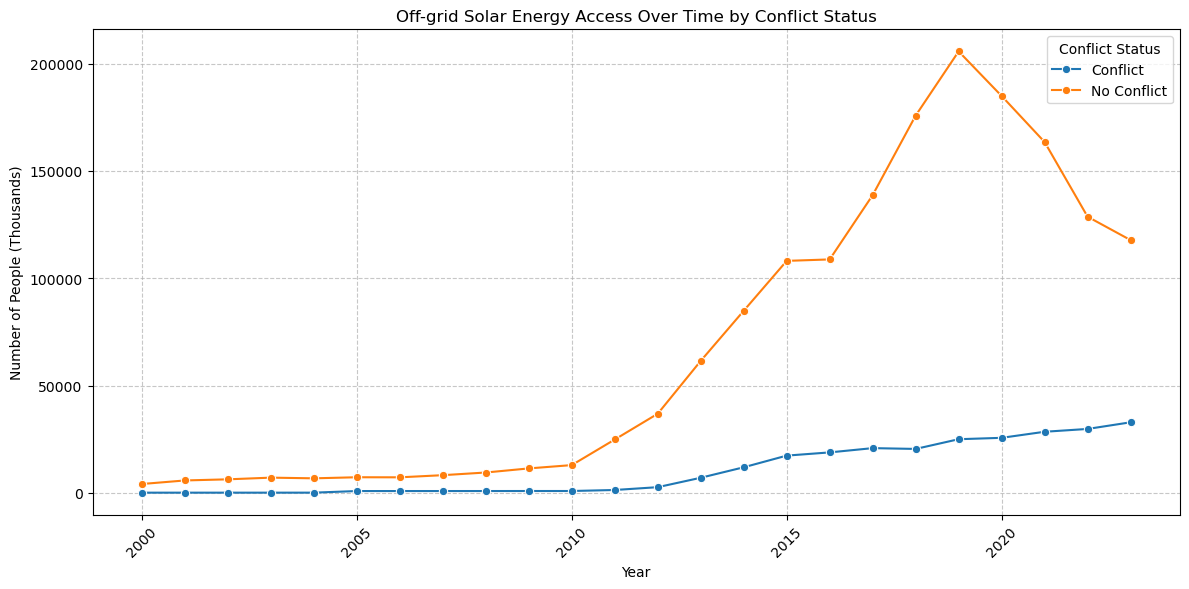

In [4]:
# Filter solar energy access data
solar_access = (
    thousands[thousands["Group Technology"] == "Solar energy"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=solar_access, x="Year", y="Value", hue="Conflict Status", marker="o")

# Customize the plot
plt.title("Off-grid Solar Energy Access Over Time by Conflict Status")
plt.xlabel("Year")
plt.ylabel("Number of People (Thousands)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Conflict Status")

plt.tight_layout()
plt.show()

This chart depicts the off-grid solar energy access (in thousands of people) over the same period. Similar to capacity, energy access is considerably higher in non-conflict regions. The trend for non-conflict areas shows a strong increase until around 2019, followed by a slight decline in recent years. In contrast, conflict-affected regions show a slow but steady increase in energy access, albeit at a much lower magnitude than non-conflict regions. This suggests that while efforts are being made to provide energy access in conflict zones, the scale and pace are limited compared to more stable environments.

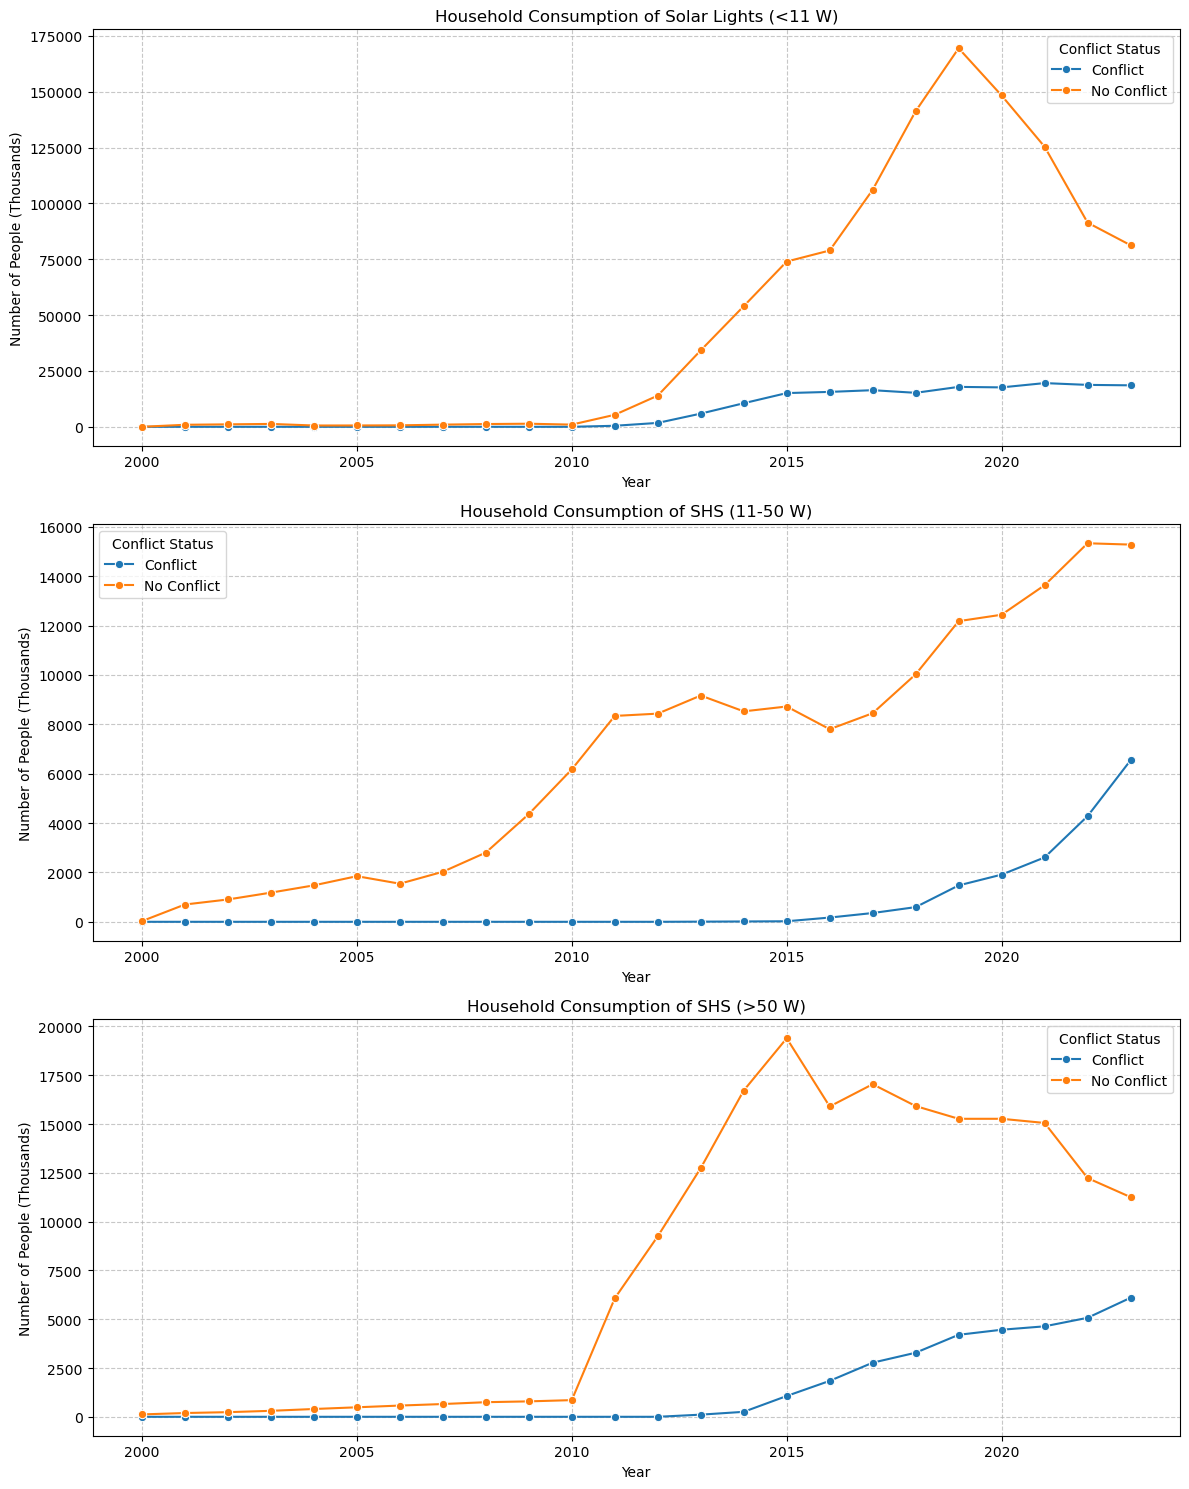

In [5]:
# Filter data for different solar technologies
solar_lights = (
    thousands[thousands["Technology"] == "Number of people using solar lights (<11 W)"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)
solar_shs_small = (
    thousands[thousands["Technology"] == "Number of people using SHS (11-50 W)"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)
solar_shs_large = (
    thousands[thousands["Technology"] == "Number of people using SHS (>50 W)"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

# Create the figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot for solar lights
sns.lineplot(
    data=solar_lights, x="Year", y="Value", hue="Conflict Status", marker="o", ax=ax1
)
ax1.set_title("Household Consumption of Solar Lights (<11 W)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of People (Thousands)")
ax1.grid(True, linestyle="--", alpha=0.7)

# Plot for small SHS
sns.lineplot(
    data=solar_shs_small, x="Year", y="Value", hue="Conflict Status", marker="o", ax=ax2
)
ax2.set_title("Household Consumption of SHS (11-50 W)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of People (Thousands)")
ax2.grid(True, linestyle="--", alpha=0.7)

# Plot for large SHS
sns.lineplot(
    data=solar_shs_large, x="Year", y="Value", hue="Conflict Status", marker="o", ax=ax3
)
ax3.set_title("Household Consumption of SHS (>50 W)")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of People (Thousands)")
ax3.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

The adoption of solar lighting and Solar Home Systems (SHS) reveals distinct patterns when comparing non-conflict and conflict regions, reflecting the unique energy challenges and solutions in these areas. For solar lights with a capacity of less than 11 W, non-conflict regions have seen significantly higher usage, with a peak around 2019 followed by a decline. In contrast, conflict regions have experienced a steady, though gradual, rise in the use of these small solar lights, underscoring their critical role as a reliable and accessible energy solution where other options are limited. 

For Solar Home Systems with capacities between 11 and 50 W, household consumption in non-conflict regions has been generally higher but fluctuates, with a noticeable uptick in recent years. Meanwhile, conflict regions started with very low adoption but have shown a marked increase in usage since around 2018. This surge suggests a growing dependence on these smaller SHS, likely driven by the lack of access to larger grid-based solutions in these areas. 

Similarly, for larger SHS with capacities exceeding 50 W, non-conflict regions have consistently had more users, peaking around 2015 before declining. In conflict regions, however, there’s been a slow but steady rise in the adoption of these more robust systems. This trend points to ongoing efforts to bring stronger off-grid energy solutions to challenging environments, where reliable power is often scarce but increasingly vital.

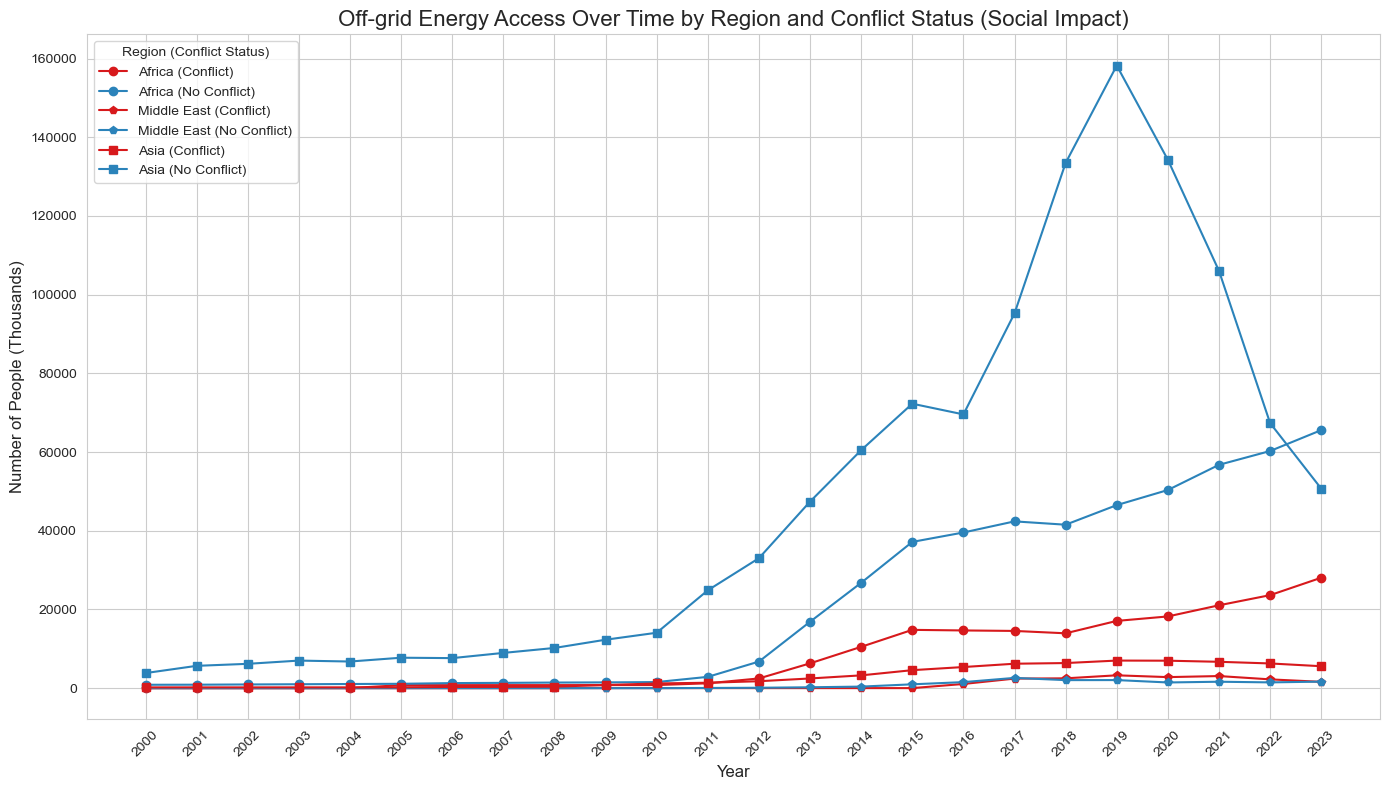

In [18]:
# Filter the data for the regions of interest
regions_of_interest = ["Africa", "Middle East", "Asia"]
regional_access = thousands[thousands["Region"].isin(regions_of_interest)]

# Group by Year, Region, and Conflict Status, then sum the values
regional_access = (
    regional_access.groupby(["Year", "Region", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

# Define markers for each region
markers = {
    "Africa": "o",
    "Asia": "s",
    "Americas": "^",
    "Oceania": "D",
    "Central America and the Caribbean": "v",
    "Middle East": "p",
    "South America": "*",
}

# Define colors for conflict status
colors = {"No Conflict": "#2b83ba", "Conflict": "#d7191c"}

# Create the plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plotting each region with different markers
for region in regions_of_interest:
    region_data = regional_access[regional_access["Region"] == region]
    for status in region_data["Conflict Status"].unique():
        status_data = region_data[region_data["Conflict Status"] == status]
        plt.plot(
            status_data["Year"],
            status_data["Value"],
            marker=markers[region],
            linestyle="-",
            color=colors[status],
            label=f"{region} ({status})",
        )

# Customize the plot
plt.title(
    "Off-grid Energy Access Over Time by Region and Conflict Status (Social Impact)",
    fontsize=16,
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of People (Thousands)", fontsize=12)
plt.xticks(status_data["Year"].unique(), rotation=45)
plt.legend(title="Region (Conflict Status)", fontsize=10)
plt.tight_layout()
plt.show()

Zooming out to a regional perspective, Africa, Asia, and the Middle East stand out as the areas with the most significant off-grid energy access, both in conflict and non-conflict settings. Within each region, non-conflict areas generally enjoy greater energy access. However, even in conflict-affected regions, there is a persistent, though slower, increase in energy access. This steady progress underscores the resilience and critical importance of off-grid solutions in providing power to communities facing difficult circumstances, where reliable energy can make a transformative difference.

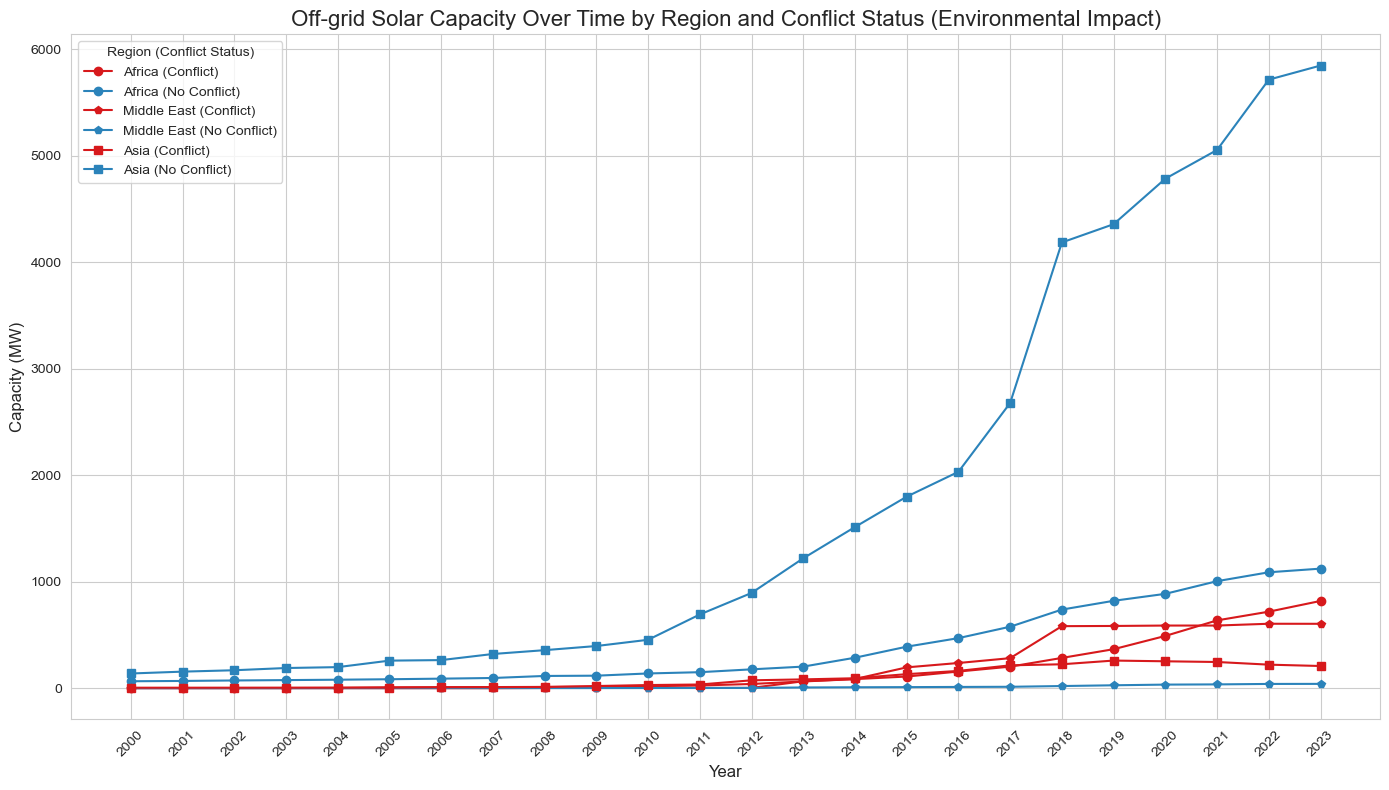

In [19]:
# Filter the data for the regions of interest
regions_of_interest = ["Africa", "Middle East", "Asia"]
regional_capacity = mw[mw["Region"].isin(regions_of_interest)]

# Group by Year, Region, and Conflict Status, then sum the values
regional_capacity = (
    regional_capacity.groupby(["Year", "Region", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

# Define markers for each region
markers = {
    "Africa": "o",
    "Asia": "s",
    "Americas": "^",
    "Oceania": "D",
    "Central America and the Caribbean": "v",
    "Middle East": "p",
    "South America": "*",
}

# Define colors for conflict status
colors = {"No Conflict": "#2b83ba", "Conflict": "#d7191c"}

# Create the plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plotting each region with different markers
for region in regions_of_interest:
    region_data = regional_capacity[regional_capacity["Region"] == region]
    for status in region_data["Conflict Status"].unique():
        status_data = region_data[region_data["Conflict Status"] == status]
        plt.plot(
            status_data["Year"],
            status_data["Value"],
            marker=markers[region],
            linestyle="-",
            color=colors[status],
            label=f"{region} ({status})",
        )

# Customize the plot
plt.title(
    "Off-grid Solar Capacity Over Time by Region and Conflict Status (Environmental Impact)",
    fontsize=16,
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Capacity (MW)", fontsize=12)
plt.xticks(status_data["Year"].unique(), rotation=45)
plt.legend(title="Region (Conflict Status)", fontsize=10)
plt.tight_layout()
plt.show()

This chart offers a clear view of off-grid solar capacity across different regions, highlighting the interplay between conflict status and sustainable energy adoption. Africa and Asia lead the way with the highest solar capacities, reflecting their significant role in the global shift toward renewable energy. Non-conflict regions across all continents consistently show a much stronger environmental impact, with greater solar capacity driving progress toward sustainability. Yet, even in conflict-affected areas, there’s a steady and inspiring rise in solar energy use. Despite the challenges of instability, these regions are increasingly embracing solar power, contributing to a greener future and showcasing the resilience of communities in adopting sustainable solutions.

# Comparative analysis

## Overall Trends and Disparities
 Across both environmental (capacity in MW) and social (people connected in
 thousands) metrics, a consistent pattern emerges: non-conflict regions exhibit
 significantly higher levels of solar PV deployment and adoption compared to conflict
affected regions. This disparity is evident in:
 Growth Trajectories: Non-conflict areas show a steeper and more consistent
 upward trend in both solar PV capacity and the number of people connected.
 This suggests that stable political and economic environments are crucial for
 fostering the rapid growth of renewable energy infrastructure and its widespread
 adoption.
 Scale of Deployment: The average capacity per country and the overall
 distribution of values indicate that larger-scale solar PV projects and more
 extensive energy access programs are predominantly found in non-conflict
 zones. In conflict areas, deployments tend to be smaller and more fragmented,
 often focusing on immediate needs rather than long-term, comprehensive
 solutions
## Regional Vulnerabilities and Resilience
 While some regions, such as Asia and Africa, show substantial solar PV activity in both
 conflict and non-conflict settings, the proportion of deployment and connections in
 non-conflict areas is overwhelmingly higher. This highlights the vulnerability of energy
 infrastructure and access initiatives to armed conflicts. However, the presence of solar
 PV in conflict zones, even at a reduced scale, also points to the resilience of
 communities and the potential for decentralized renewable energy solutions to
 provide critical services in challenging environments.
## Interconnectedness of Environmental and Social Impacts
 The analysis reveals a strong interconnectedness between the environmental and
 social impacts. Limited solar PV capacity in conflict zones directly translates to fewer
 people having access to clean energy. This means that the environmental benefits of
 reduced reliance on fossil fuels are constrained, and the social benefits of improved
 health, education, and economic opportunities are not fully realized. Armed conflicts
 create a vicious cycle where instability hinders sustainable energy development,
 which in turn perpetuates energy poverty and exacerbates humanitarian challenges

# Some statistical analysis

In [6]:
from statsmodels.formula.api import ols

import statsmodels.api as sm


def perform_statistical_analysis_existing(mw_df, thousands_df):
    # Define solar PV technologies for the MW dataframe
    solar_technologies_mw = [
        "Other off-grid solar PV",
        "Other off-grid solar PV (of which health)",
        "Other off-grid solar PV (of which commercial/public)",
        "Other off-grid solar PV (of which education)",
        "Other off-grid solar PV (of which not specified)",
        "Other off-grid solar PV (of which industry)",
        "Other off-grid solar PV (of which tourism)",
        "Other off-grid solar PV (of which public lighting)",
        "Other off-grid solar PV (of which communication)",
        "Other off-grid solar PV (of which residential)",
        "Other off-grid solar PV (of which agriculture)",
        "Other off-grid solar PV (of which multi-purpose)",
        "Solar mini-grids",
        "Solar lights (<11 W)",
        "Solar pumps",
        "Solar pumps (public water supply)",
        "Solar pumps (agriculture)",
        "Solar home systems (SHS 11-50 W)",
        "Solar home systems (SHS >50 W)",
        "Solar cookers",
        "Solar lights and solar home systems (SHS)",
    ]
    solar_mw_df = mw_df[mw_df["Technology"].isin(solar_technologies_mw)]

    # Define social impact technologies for the Thousands dataframe
    social_technologies_thousands = [
        "Number of people connected to hydropower",
        "Number of people using solar lights (<11 W)",
        "Number of people connected to solar mini-grids (Tier 1)",
        "Number of people connected to solar mini-grids (Tier 2+)",
        "Number of people using SHS (11-50 W)",
        "Number of people using SHS (>50 W)",
        "Number of people served by solar cookers",
    ]
    social_thousands_df = thousands_df[
        thousands_df["Technology"].isin(social_technologies_thousands)
    ]

    print("\n--- Statistical Analysis of Environmental Impact (MW) ---")
    if not solar_mw_df.empty:
        # ANOVA: Value ~ Conflict Status
        model_mw = ols('Value ~ C(Q("Conflict Status"))', data=solar_mw_df).fit()
        anova_table_mw = sm.stats.anova_lm(model_mw, typ=2)
        print("\nANOVA for Solar PV Capacity (MW) by Conflict Status:")
        print(anova_table_mw)

        # Regression analysis: Value ~ Year + Conflict Status
        solar_mw_df_copy = solar_mw_df.copy()
        solar_mw_df_copy["Conflict_Status_Encoded"] = (
            solar_mw_df_copy["Conflict Status"].astype("category").cat.codes
        )
        model_mw_reg = ols(
            'Value ~ Year + C(Q("Conflict Status"))', data=solar_mw_df_copy
        ).fit()
        print("\nRegression Analysis for Solar PV Capacity (MW):")
        print(model_mw_reg.summary())
    else:
        print("No data available for environmental impact analysis.")

    print("\n--- Statistical Analysis of Social Impact (Thousands) ---")
    if not social_thousands_df.empty:
        # ANOVA: Value ~ Conflict Status
        model_social = ols(
            'Value ~ C(Q("Conflict Status"))', data=social_thousands_df
        ).fit()
        anova_table_social = sm.stats.anova_lm(model_social, typ=2)
        print("\nANOVA for People Connected (Thousands) by Conflict Status:")
        print(anova_table_social)

        # Regression analysis: Value ~ Year + Conflict Status
        social_thousands_df_copy = social_thousands_df.copy()
        social_thousands_df_copy["Conflict_Status_Encoded"] = (
            social_thousands_df_copy["Conflict Status"].astype("category").cat.codes
        )
        model_social_reg = ols(
            'Value ~ Year + C(Q("Conflict Status"))', data=social_thousands_df_copy
        ).fit()
        print("\nRegression Analysis for People Connected (Thousands):")
        print(model_social_reg.summary())
    else:
        print("No data available for social impact analysis.")


# Run the statistical analysis using the existing dataframes 'mw' and 'thousands'
perform_statistical_analysis_existing(mw, thousands)


--- Statistical Analysis of Environmental Impact (MW) ---

ANOVA for Solar PV Capacity (MW) by Conflict Status:
                               sum_sq       df         F  PR(>F)
C(Q("Conflict Status"))  6.630360e+02      1.0  1.324475  0.2498
Residual                 1.448144e+07  28928.0       NaN     NaN

Regression Analysis for Solar PV Capacity (MW):
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     98.24
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           3.03e-43
Time:                        09:24:55   Log-Likelihood:            -1.3086e+05
No. Observations:               28930   AIC:                         2.617e+05
Df Residuals:                   28927   BIC:                         2.618e+05
Df Model:  

### ANOVA for Solar PV Capacity by Conflict Status
| Source                        | sum_sq         | df       | F        | PR(>F) |
|------------------------------|----------------|----------|----------|--------|
| C(Q("Conflict Status"))      | 6.630360e+02   | 1.0      | 1.324475 | 0.2498 |
| Residual                     | 1.448144e+07   | 28928.0  | NaN      | NaN    |


The p-value for C(Q("Conflict Status")) is 0.2498. Since this p-value is greater than 0.05, we do not find a statistically significant difference in the mean solar PV capacity (MW) between conflict-affected and non-conflict regions based on this ANOVA model. This suggests that, when considering only the binary conflict status, the average solar PV capacity does not differ significantly between these two groups.


### Regression Analysis for People Connected (Thousands)

- R-squared: 0.004, indicating that only 0.4% of the variation in the number of people connected is explained by Year and Conflict Status.

- Year: The coefficient for Year is 19.2464 with a p-value of 0.000. This is statistically significant, suggesting that, on average, the number of people connected to solar PV systems increased by approximately 19.2464 thousand each year, holding conflict status constant.

- C(Q("Conflict Status"))[T.No Conflict]: The coefficient is 14.4204 with a p-value of 0.774. This is not statistically significant. This means that, after accounting for the effect of Year, there is no statistically significant difference in the number of people connected between conflict and non-conflict regions.

- Overall Model Fit: The R-squared value of 0.004 is extremely low, indicating that the model has very little explanatory power. Similar to the environmental impact analysis, the high Cond. No. suggests potential multicollinearity or other numerical problems.



# Overall Interpretation and Limitations

Both the ANOVA and regression analyses for both environmental (MW capacity) and social (people connected) impacts consistently show that the binary Conflict Status variable, does not have a statistically significant direct impact on the Value (capacity or people connected) when controlling for Year. The Year variable, however, is consistently significant, indicating a general upward trend in solar PV deployment and access over time, regardless of conflict status.

### Key Takeaways and Caveats:
<ol>

<li>Statistical vs. Visual Trends: While the visual trends in the previous analysis might have suggested differences, these statistical models, which control for the effect of time, do not find a statistically significant difference attributable solely to the binary Conflict Status. This highlights the importance of statistical testing to confirm observed patterns.</li>

<li>Limited Explanatory Power: The extremely low R-squared values (0.007 for MW and 0.004 for Thousands) are crucial. They indicate that Year and the binary Conflict Status explain a negligible amount of the variation in solar PV capacity and connections. This strongly suggests that there are many other, more influential factors at play that were not included in these models.</li>

<li>Binary Conflict Definition: The primary limitation is the simplistic binary definition of conflict status. Real-world conflicts vary greatly in intensity, duration, and geographical spread. A country might be classified as 'Conflict' even if only a small region is affected, which could dilute the observed impact on national-level solar PV data.</li>

<li>Confounding Variables: The models do not account for other critical factors that influence solar PV deployment and access, such as economic development, specific government policies, international aid, geographical characteristics, and energy demand. These unobserved variables are likely confounding the relationship, meaning they are correlated with both conflict status and solar PV adoption, making it difficult to isolate the true effect of conflict.</li>

<li>Data Aggregation: The data is aggregated at the country-year level. This means that localized impacts within a country (e.g., a specific region heavily affected by conflict) might be averaged out and not visible in the national-level data.</li>

<li>Causality: These statistical models demonstrate correlation (or lack thereof), not causation. While conflict might hinder solar PV development, it's also plausible that regions with lower development (and thus lower solar PV adoption) are more susceptible to conflict.</li>

<li>Time Lag Effects: The models assume an immediate effect of conflict status. However, the impact of conflict on infrastructure development and energy access might have a delayed effect, manifesting several years after the conflict begins or ends. The current models do not account for such time lags.</li>

</ol>


# TL;DR:
> This analysis focuses on the social and environmental aspects, while other team members addressed some of the above mentioned limitations in more depth.